In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 実行環境(PC/OS)によってフォントをインストール・調節する必要がある。
plt.rcParams['font.family'] = 'MS Mincho' # matplotlib の図のフォントを設定
plt.rcParams["figure.figsize"] = [5, 3]  # 図のサイズ
plt.rcParams['font.size'] = 12            #フォントサイズ default : 12
plt.rcParams['xtick.labelsize'] = 12 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 12
plt.rc('legend', fontsize=12)

In [2]:
#code3.1 焼肉データの読み込み
import pandas as pd
#pandasのデータフレームとしてcsvファイルを読み込む
df=pd.read_csv('yakiniku_2018.csv', parse_dates=['日付'])
#データフレームの中身を確認する
df.head()

,店舗ID,日付,時間,取引ID,取引明細ID,商品ID,商品名,単価,数量,支払方法,分類
0,1,2018-03-01,114818,1,1,112,霜降切落し焼肉定食,1300,1,クレジット,定食
1,1,2018-03-01,114818,1,2,121,Ｓとろろ,0,1,クレジット,サイド
2,1,2018-03-01,114950,2,1,104,石焼ビビンバ定食,1100,1,クレジット,定食
3,1,2018-03-01,115043,3,2,625,黒毛和牛サーロイン焼肉,1200,1,クレジット,肉
4,1,2018-03-01,115043,3,3,330,ご飯,200,1,クレジット,サイド


In [3]:
#code3.2 焼肉データの基礎集計
#データの期間を確認する
print(df['日付'].min())
print(df['日付'].max())

#営業日数を確認する
print(len(df['日付'].unique()))

2018-03-01 00:00:00
2019-02-28 00:00:00
364


In [4]:
#code3.3 売上金額の基礎集計
#売上金額の合計を新しい列としてオリジナルデータdfに追加しておく
df['売上金額']=df['単価']*df['数量']
total=df['売上金額'].sum()
print(total)

#売上金額トップ10の商品
top10=df[['商品名','売上金額']].groupby('商品名').sum()
top10=top10.sort_values('売上金額',ascending=False).head(10)
top10

137681100


,売上金額
商品名,
今宵の贅沢福牛盛り,9361200
生ビール（中）,5554000
焼肉４０００コース,5435200
タン塩大判切り,4874100
赤身・ハラミ焼肉定食,3505500
厳選ハラミ焼肉定食,2989000
厳選ハラミ,2877000
カルビ・ハラミ焼肉定食,2829000
カルビ・ロース・ハラミ焼肉定食,2563600


In [5]:
#code3.4　商品種類数の計算
print(len(df['商品名'].unique()))

323


In [6]:
#code3.5　売上数量トップ10の商品
num10=df[['商品名','数量']].groupby('商品名').sum()
num10=num10.sort_values('数量',ascending=False).head(10)
num10

,数量
商品名,
生ビール（中）,11108
ご飯,5636
烏龍茶,4600
・大判切りタン塩,4577
・大判ハラミ１枚切リ,4519
タン塩大判切り,4431
ご飯大盛り,3277
厳選ハラミ焼肉定食,2989
・デザート,2955


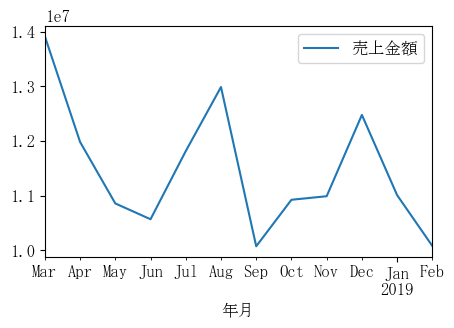

In [7]:
#code 3.6 月別の売上金額を計算し可視化

# 年月を新しい列としてオリジナルデータdfに追加しておく(後のセルで利用するため)。
df['年月'] = df['日付'].dt.to_period('M')

# 月別の売上金額を計算
month_amt = df[['年月', '売上金額']].groupby(['年月']).sum()
# 折れ線グラフを出力
ax = month_amt.plot()
ax.get_figure().savefig('out/3-1a.png')  # ファイルにグラフを保存

,売上金額
年月,
2018-03,448819.354839
2018-04,399400.000000
2018-05,350264.516129
2018-06,352316.666667
2018-07,381112.903226
2018-08,418906.451613
2018-09,335843.333333
2018-10,352422.580645
2018-11,366340.000000


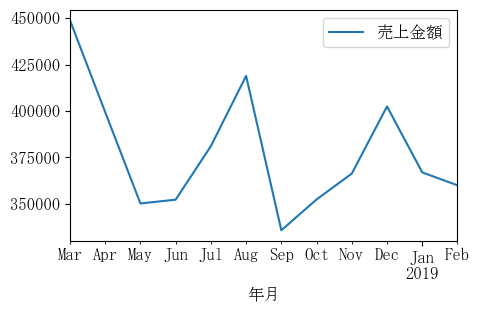

In [8]:
#code3.7 月別に1日当たりの平均金額を計算し可視化する
ds = pd.DataFrame()
day_amt = df[['日付','売上金額']].groupby('日付', as_index = False).sum()

day_amt['年月'] = day_amt['日付'].dt.to_period('M')
day_avg = day_amt[['年月', '売上金額']].groupby(['年月']).mean()
display(day_avg.head(12))

ax = day_avg.plot()
ax.get_figure().savefig('out/3-1b.png')

In [9]:
#code3.8　売上金額トップ10の日付
day10=df[['日付','売上金額']].groupby('日付').sum()
day10=day10.sort_values('売上金額',ascending=False).head(10)
day10

,売上金額
日付,
2019-02-10,910100
2019-01-02,898900
2018-07-14,819600
2018-03-25,788900
2018-06-02,788900
2018-03-03,782500
2018-05-03,746700
2018-12-29,744200
2018-03-31,723800
